## Logistic Regression
___

### import models and libraries, read dataset into dataframe

In [1]:
# import models and libraries
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [2]:
# read CSV file 
satisfaction_df = pd.read_csv('https://raw.githubusercontent.com/FuneralDepression/passengerSatisfactionCSV/main/satisfaction_2015.csv')
satisfaction_df.shape

(129880, 24)

### Showscase dataset

In [3]:
satisfaction_df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,...,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,...,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,...,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,...,3,3,3,4,5,3,4,3,0,0.0


In [ ]:
satisfaction_df.info()

In [ ]:
satisfaction_df.isnull().sum()

In [ ]:
satisfaction_df['satisfaction_v2'].value_counts().plot(kind='bar', rot=0, title='Satisfied vs neutral/dissatisfied')
satisfaction_df['satisfaction_v2'].value_counts()

### Adjust dataset

In [4]:
# drop columns that do not contain useful information
satisfaction_df.drop("id",axis=1,inplace= True)
# drop missing values rows
satisfaction_df.dropna(axis=0,inplace=True)

In [5]:
# rename some columns
satisfaction_df.rename(columns = {"Inflight wifi service": "Wifi",
                        "Departure/Arrival time convenient": "Time convenience",
                        "Ease of Online booking": "Online booking",
                        "Departure Delay in Minutes": "Departure delay",
                        "Arrival Delay in Minutes": "Arrival delay",
                        "satisfaction_v2":"Satisfaction"},inplace = True)


In [6]:
# Encode categorical data
ord_enc = OrdinalEncoder()
satisfaction_df["Gender_code"] = ord_enc.fit_transform(satisfaction_df[["Gender"]])
satisfaction_df["Customer_code"] = ord_enc.fit_transform(satisfaction_df[["Customer Type"]])
satisfaction_df["Travel_code"] = ord_enc.fit_transform(satisfaction_df[["Type of Travel"]])
satisfaction_df["Class_code"] = ord_enc.fit_transform(satisfaction_df[["Class"]])

satisfaction_df[["Gender", "Gender_code","Customer Type", "Customer_code","Class", "Class_code","Type of Travel", "Travel_code"]].head()

,Gender,Gender_code,Customer Type,Customer_code,Class,Class_code,Type of Travel,Travel_code
0,Male,1.0,disloyal Customer,1.0,Eco,1.0,Personal Travel,1.0
1,Male,1.0,disloyal Customer,1.0,Eco,1.0,Personal Travel,1.0
2,Male,1.0,disloyal Customer,1.0,Eco,1.0,Personal Travel,1.0
3,Female,0.0,disloyal Customer,1.0,Eco,1.0,Personal Travel,1.0
4,Male,1.0,disloyal Customer,1.0,Eco,1.0,Personal Travel,1.0


In [7]:
#scale numerical
num_features=['Flight Distance','Departure delay','Arrival delay','Age']
scaler=StandardScaler()
satisfaction_df[num_features]=scaler.fit_transform(satisfaction_df[num_features])
satisfaction_df.head()

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Wifi,Time convenience,Online booking,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure delay,Arrival delay,Gender_code,Customer_code,Travel_code,Class_code
0,satisfied,Male,disloyal Customer,1.096160,Personal Travel,Eco,-0.823222,0,2,0,...,3,3,4,3,-0.386036,-0.392329,1.0,1.0,1.0,1.0
1,satisfied,Male,disloyal Customer,0.633122,Personal Travel,Eco,1.298963,0,2,1,...,4,4,3,2,-0.386036,-0.392329,1.0,1.0,1.0,1.0
2,satisfied,Male,disloyal Customer,1.030012,Personal Travel,Eco,0.258421,0,3,0,...,3,2,3,3,-0.386036,-0.392329,1.0,1.0,1.0,1.0
3,satisfied,Female,disloyal Customer,-0.226807,Personal Travel,Eco,0.311550,0,4,0,...,5,5,5,4,-0.386036,-0.392329,0.0,1.0,1.0,1.0
4,satisfied,Male,disloyal Customer,1.030012,Personal Travel,Eco,-0.614712,0,5,0,...,5,3,4,3,-0.386036,-0.392329,1.0,1.0,1.0,1.0


In [8]:
features = ['Gender_code','Customer_code','Age','Travel_code','Class_code','Flight Distance','Wifi'
           ,'Time convenience','Online booking','Gate location','Food and drink','Online boarding'
           ,'Seat comfort','Inflight entertainment','On-board service','Leg room service'
           ,'Baggage handling','Checkin service','Inflight service','Cleanliness','Departure delay','Arrival delay'] 
X = satisfaction_df[features]
y = satisfaction_df['Satisfaction']
satisfaction_df.head()

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Wifi,Time convenience,Online booking,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure delay,Arrival delay,Gender_code,Customer_code,Travel_code,Class_code
0,satisfied,Male,disloyal Customer,1.096160,Personal Travel,Eco,-0.823222,0,2,0,...,3,3,4,3,-0.386036,-0.392329,1.0,1.0,1.0,1.0
1,satisfied,Male,disloyal Customer,0.633122,Personal Travel,Eco,1.298963,0,2,1,...,4,4,3,2,-0.386036,-0.392329,1.0,1.0,1.0,1.0
2,satisfied,Male,disloyal Customer,1.030012,Personal Travel,Eco,0.258421,0,3,0,...,3,2,3,3,-0.386036,-0.392329,1.0,1.0,1.0,1.0
3,satisfied,Female,disloyal Customer,-0.226807,Personal Travel,Eco,0.311550,0,4,0,...,5,5,5,4,-0.386036,-0.392329,0.0,1.0,1.0,1.0
4,satisfied,Male,disloyal Customer,1.030012,Personal Travel,Eco,-0.614712,0,5,0,...,5,3,4,3,-0.386036,-0.392329,1.0,1.0,1.0,1.0


In [ ]:
# RECURSIVE FEATURE ELIMINATION
rfe_selector=RFE(estimator=LogisticRegression(max_iter=800),n_features_to_select=10, step=1,verbose=5)
rfe_selector.fit(X,y)
ranking = rfe_selector.ranking_


In [ ]:
rank=[]
for i in range(len(ranking)):
    rank.append(f"{ranking[i]}.{X.columns[i]}")
rank   

___
### LOGISTIC REGRESSION + Cross Validation (ALL 23 FEATURES)

In [11]:
predicted = cross_val_predict(LogisticRegression(max_iter=800), X, y, cv=10)
accuracy = metrics.accuracy_score(y,predicted)
report = metrics.classification_report(y, predicted) 

0.8104751828368871


In [12]:
print(accuracy)
print(report)

0.8104751828368871
                         precision    recall  f1-score   support

neutral or dissatisfied       0.83      0.84      0.83     73225
              satisfied       0.79      0.77      0.78     56262

               accuracy                           0.81    129487
              macro avg       0.81      0.81      0.81    129487
           weighted avg       0.81      0.81      0.81    129487



### 81.05% accuracy

___
### Probability (23 features)+ROC+AUC

In [ ]:
# Estimating the probability of Each Label: 
proba = cross_val_predict(LogisticRegression(max_iter=800), X, y, cv=10, method='predict_proba')
fpr, tpr, thresholds = metrics.roc_curve(y, proba[:,1], pos_label='satisfied')
# AUC:
AUC = metrics.auc(fpr, tpr)
print(round(AUC,2))

In [ ]:
# ROC
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

### AUC 84%

___
### LOGISTIC REGRESSION + Cross Validation ( 16 FEATURES)

In [13]:
features_16 = ['Customer_code','Age','Travel_code','Class_code','Wifi','Online boarding'
               ,'Time convenience','Online booking','On-board service','Baggage handling'
               ,'Leg room service','Checkin service','Cleanliness'] 
X_16 = satisfaction_df[features_16]

In [14]:
predicted_16 = cross_val_predict(LogisticRegression(max_iter=800), X_16, y, cv=10)
accuracy_16 = metrics.accuracy_score(y,predicted)
report_16 = metrics.classification_report(y, predicted) 

In [15]:
print(accuracy_16)
print(report_16)

0.8136878605574305
                         precision    recall  f1-score   support

neutral or dissatisfied       0.83      0.84      0.84     73225
              satisfied       0.79      0.78      0.78     56262

               accuracy                           0.81    129487
              macro avg       0.81      0.81      0.81    129487
           weighted avg       0.81      0.81      0.81    129487



### 81.37% accuracy

___
### Probability (16 features)+ROC+AUC

In [ ]:
# Estimating the probability of Each Label: 
proba = cross_val_predict(LogisticRegression(max_iter=800), X_16, y, cv=10, method='predict_proba')
fpr, tpr, thresholds = metrics.roc_curve(y, proba[:,1], pos_label='satisfied')
# AUC:
AUC = metrics.auc(fpr, tpr)
print(round(AUC,2))

In [ ]:
# ROC
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

### 84% AUC

___
### LOGISTIC REGRESSION + Cross Validation ( 10 FEATURES)

In [23]:
features_10 = ['Customer_code','Travel_code','Class_code','Wifi','Online boarding'
               ,'Online booking','On-board service'
               ,'Leg room service','Checkin service','Cleanliness'] 
X_10 = satisfaction_df[features_10]

In [24]:
predicted_10 = cross_val_predict(LogisticRegression(max_iter=800), X_10, y, cv=10)
accuracy_10 = metrics.accuracy_score(y,predicted)
report_10 = metrics.classification_report(y, predicted)

In [25]:
print(accuracy_10)
print(report_10)

0.8124213241483701
                         precision    recall  f1-score   support

neutral or dissatisfied       0.83      0.84      0.83     73225
              satisfied       0.79      0.78      0.78     56262

               accuracy                           0.81    129487
              macro avg       0.81      0.81      0.81    129487
           weighted avg       0.81      0.81      0.81    129487



### 81.24% accuracy

___
### Probability (10 features)+ROC+AUC

In [29]:
# Estimating the probability of Each Label: 
proba = cross_val_predict(LogisticRegression(max_iter=800), X_10, y, cv=10, method='predict_proba')
fpr, tpr, thresholds = metrics.roc_curve(y, proba[:,1], pos_label='satisfied')
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.8419771380299839


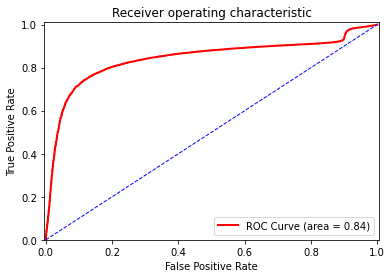

In [28]:
# ROC
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

### AUC 84%